<a href="https://colab.research.google.com/github/vikaschaudhary53/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction(ML%20Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project-Linear Regression/SeoulBikeData.csv'

In [ ]:
df = pd.read_csv(file_path, encoding="ISO-8859–1")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Rename the Columns
column_dict = {'Date':'date', 'Rented Bike Count':'rented_bikes', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility', 
               'Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radition', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)': 'snowfall', 'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning_day'}

In [ ]:
df.rename(columns= column_dict, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bikes           8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radition         8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
df.describe()

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
len(df[df.duplicated()])

0

In [ ]:
#No Bike Rented
df[df['rented_bikes']==0]

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [ ]:
df.nunique()

date                      365
rented_bikes             2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radition            345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

In [ ]:
len(df['date'].value_counts())*len(df['hour'].value_counts())

8760

In [ ]:
df["holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

####Extracting the 'date', 'month' from complete date

In [ ]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [ ]:
df['week'] = df['day'].apply(lambda x: "weekend" if x=='Saturday' or x == 'Sunday' else 'weekday')

In [ ]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,day,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,weekday


In [ ]:
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [ ]:
#lets convert month number into 'String'
df['month'] = df['date'].dt.month_name()

In [ ]:
df.head()

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,day,week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,Friday,weekday


In [ ]:
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

In [ ]:
df.columns

Index(['date', 'rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'year', 'month',
       'day', 'week'],
      dtype='object')

###EDA of Every Feature

#####Dependent Feature

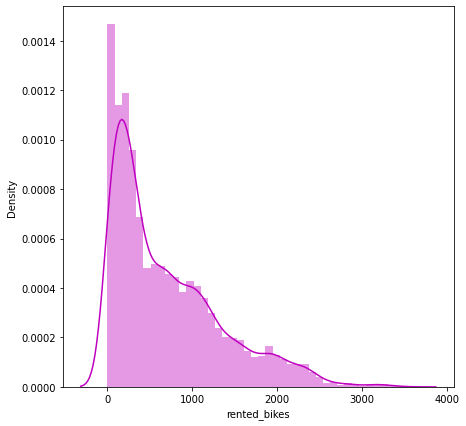

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bikes'],color="m")
plt.show()

######Independent Features

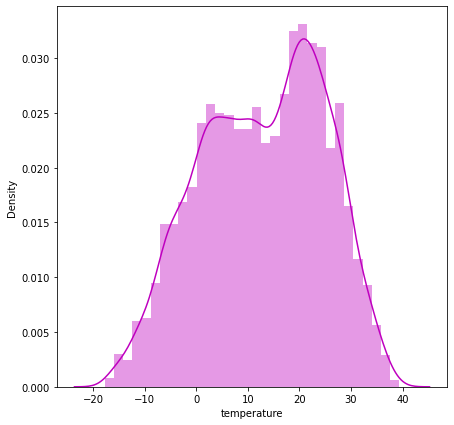

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['temperature'],color="m")
plt.show()

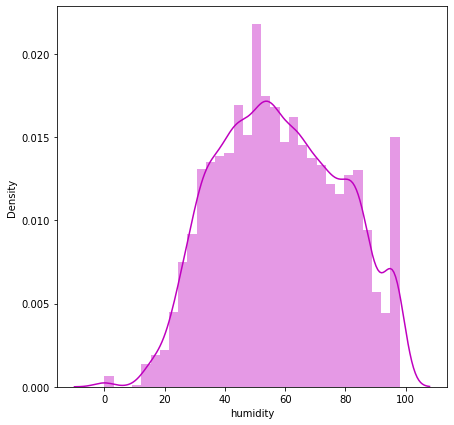

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['humidity'],color="m")
plt.show()

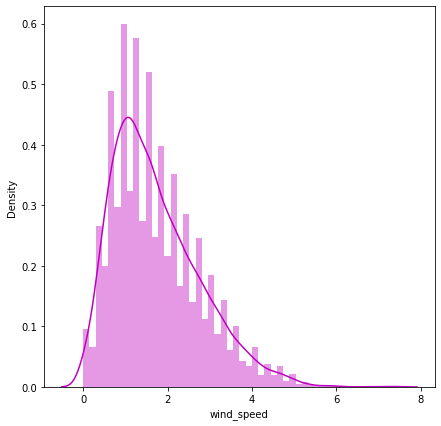

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['wind_speed'],color="m")
plt.show()

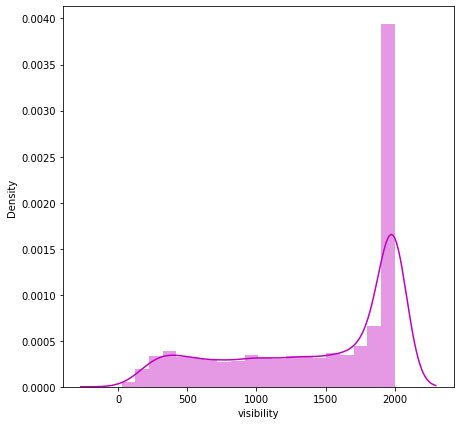

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['visibility'],color="m")
plt.show()

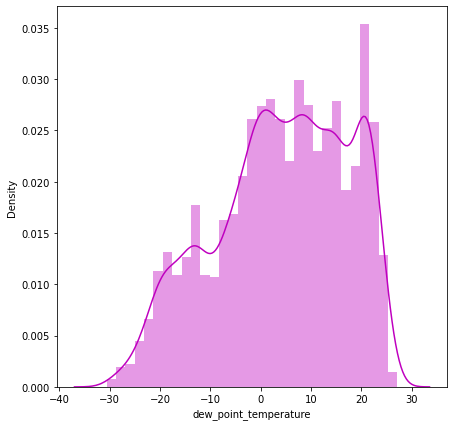

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['dew_point_temperature'],color="m")
plt.show()

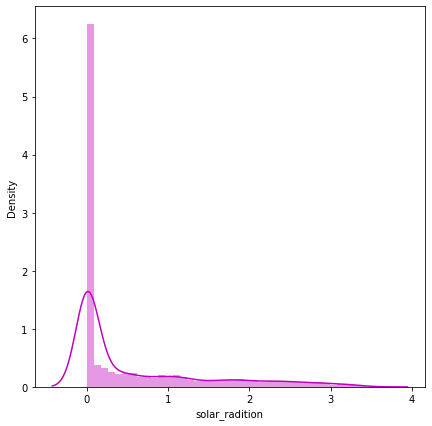

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['solar_radition'],color="m")
plt.show()

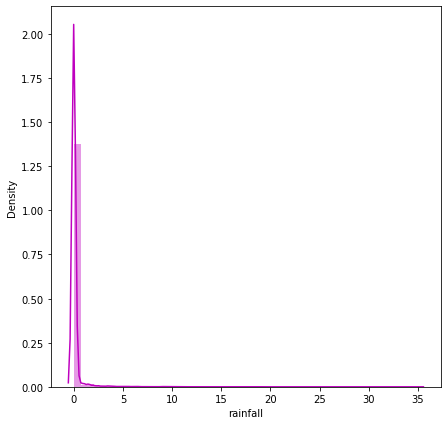

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rainfall'],color="m")
plt.show()

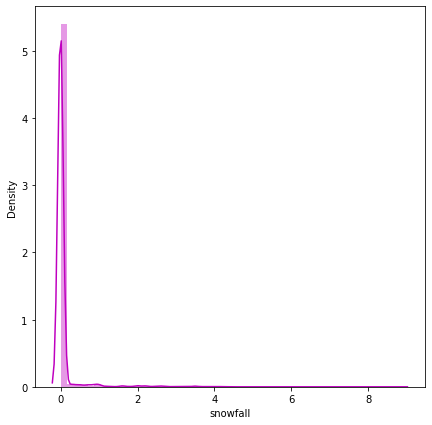

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['snowfall'],color="m")
plt.show()

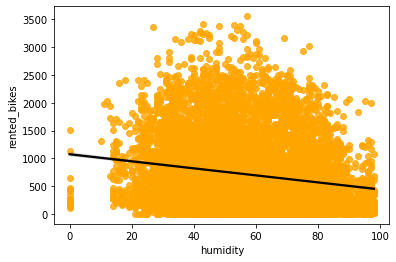

In [ ]:
sns.regplot(x=df['humidity'],y=df['rented_bikes'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

In [ ]:
df[df['rented_bikes']>2400]

,date,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,seasons,holiday,functioning_day,year,month,day,week
2946,2018-04-02,2401,18,20.7,54,4.1,1484,11.0,0.50,0.0,0.0,Spring,No Holiday,Yes,2018,April,Monday,weekday
2994,2018-04-04,2402,18,16.0,47,2.1,2000,4.6,0.79,0.0,0.0,Spring,No Holiday,Yes,2018,April,Wednesday,weekday
3114,2018-04-09,2401,18,14.8,24,1.3,1514,-5.6,0.69,0.0,0.0,Spring,No Holiday,Yes,2018,April,Monday,weekday
3210,2018-04-13,2404,18,17.5,18,1.3,2000,-7.1,0.23,0.0,0.0,Spring,No Holiday,Yes,2018,April,Friday,weekday
3282,2018-04-16,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes,2018,April,Monday,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,2018-10-19,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes,2018,October,Friday,weekday
7818,2018-10-22,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes,2018,October,Monday,weekday
7842,2018-10-23,2415,18,14.5,71,2.1,1235,9.2,0.06,0.0,0.0,Autumn,No Holiday,Yes,2018,October,Tuesday,weekday
7866,2018-10-24,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes,2018,October,Wednesday,weekday


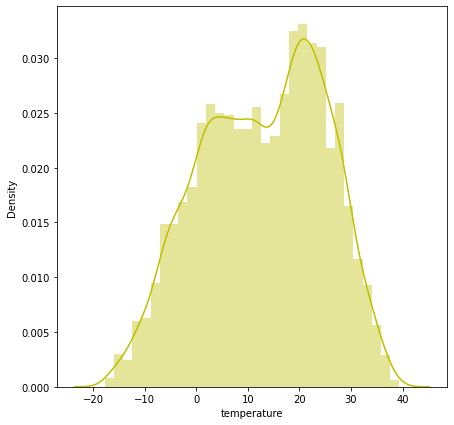

In [ ]:
#Independent Feature
plt.figure(figsize=(7,7))
sns.distplot(df['temperature'],color="y")

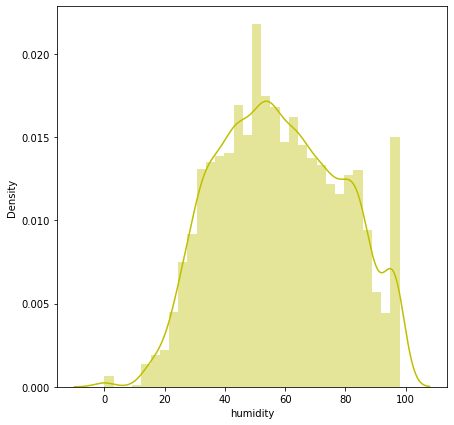

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['humidity'],color="y")

In [ ]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['seasons', 'holiday', 'functioning_day', 'month', 'day', 'week'], dtype='object')

In [ ]:
df_copy = df.drop(columns=['date'])

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,rented_bikes,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,year,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,functioning_day_Yes,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,week_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_copy.drop(columns=['rented_bikes'], axis=1)
y = np.sqrt(df_copy['rented_bikes'])

In [ ]:
X.head()

,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radition,rainfall,snowfall,year,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,functioning_day_Yes,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,week_weekend
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented_bikes, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 33)
(2190, 33)


In [ ]:
df_copy.describe().columns

Index(['rented_bikes', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radition', 'rainfall',
       'snowfall', 'year', 'seasons_Spring', 'seasons_Summer',
       'seasons_Winter', 'holiday_No Holiday', 'functioning_day_Yes',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'week_weekend'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.6829899900719609

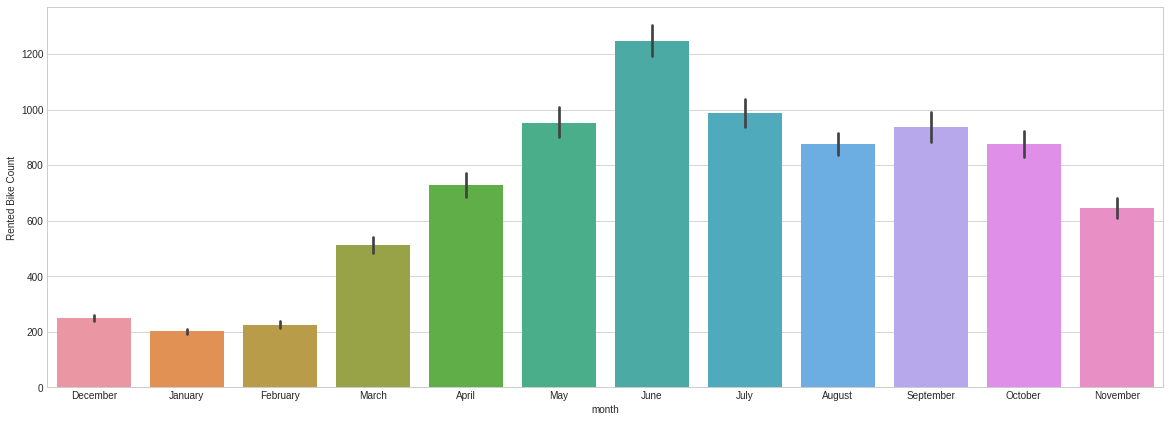

In [ ]:
plt.figure(figsize=(20,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='month',y='Rented Bike Count')

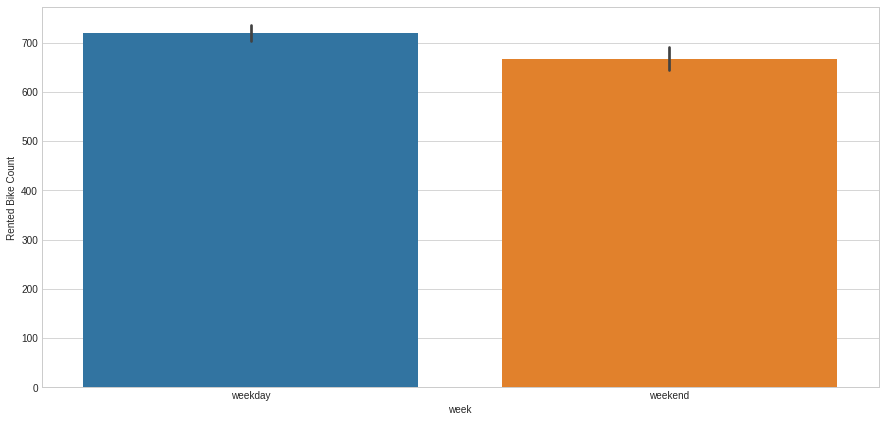

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='week',y='Rented Bike Count')

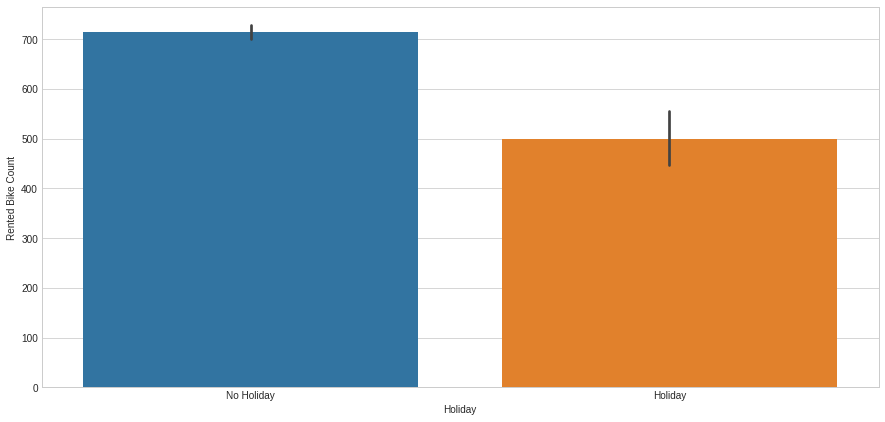

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='Holiday',y='Rented Bike Count')

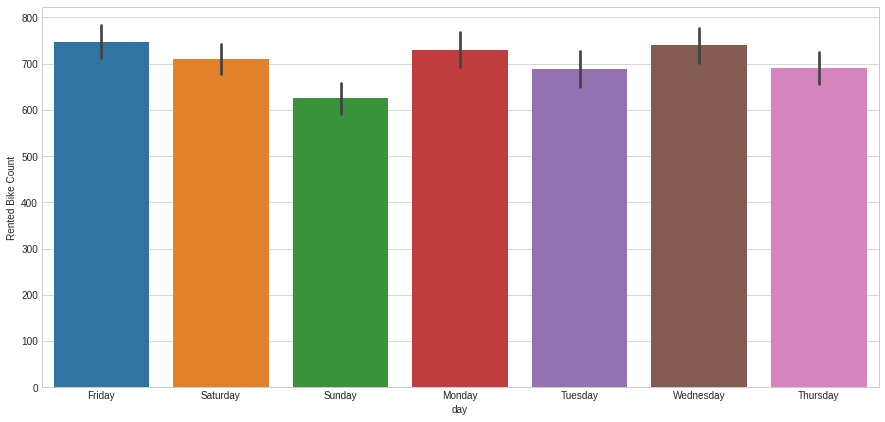

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='day',y='Rented Bike Count')

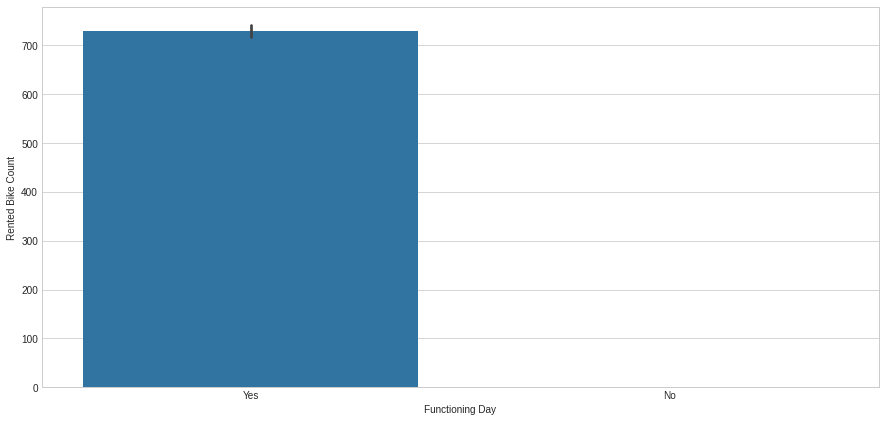

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count')

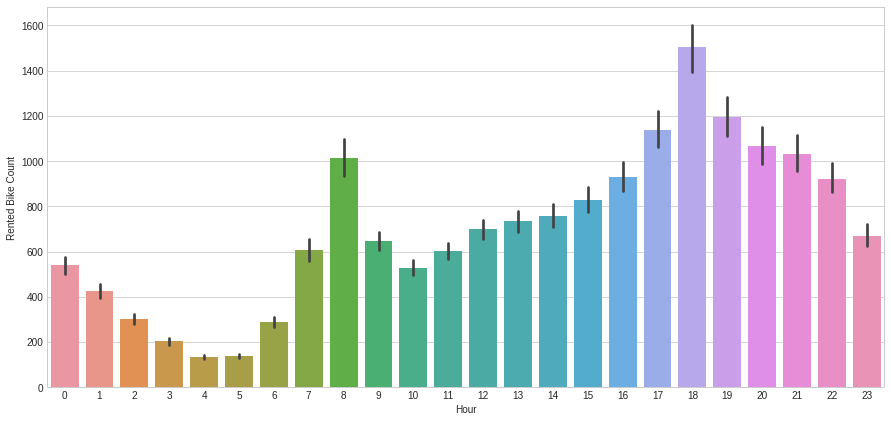

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='Hour',y='Rented Bike Count')

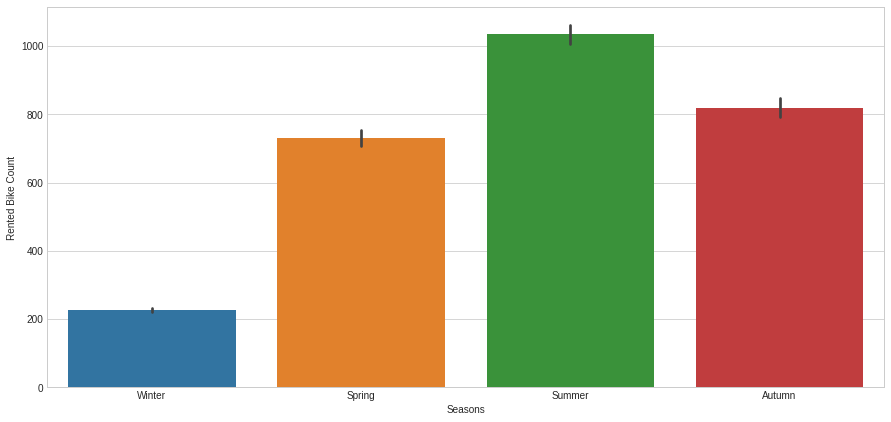

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')
sns.barplot(data=df,x='Seasons',y='Rented Bike Count')